***INSURANCE CLAIM FRAUD DETECTION***


Project Description
Insurance fraud is a huge problem in the industry. It&#39;s difficult to identify fraud claims. Machine
Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along
with the customer details. It also has the details of the accident on the basis of which the claims
have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can
create a predictive model that predicts if an insurance claim is fraudulent or not. 


Independent Variables
1. months_as_customer: Number of months of patronage

2. age: the length of time a customer has lived or a thing has existed

3. policy_number: It is a unique id given to the customer, to track the subscription status
and other details of customer

4. policy_bind_date:date which document that is given to customer after we accept your
proposal for insurance

5. policy_state: This identifies who is the insured, what risks or property are covered, the
policy limits, and the policy period

6. policy_csl: is basically Combined Single Limit

7. policy_deductable: the amount of money that a customer is responsible for paying
toward an insured loss

8. policy_annual_premium: This means the amount of Regular Premium payable by the
Policyholder in a Policy Year

9. umbrella_limit: This means extra insurance that provides protection beyond existing
limits and coverages of other policies

10. insured_zip: It is the zip code where the insurance was made

11. insured_sex: This refres to either of the two main categories (male and female) into
which customer are divided on the basis of their reproductive functions

12. insured_education_level: This refers to the Level of education of the customer

13. insured_occupation: This refers Occupation of the customer


14. insured_hobbies: This refers to an activity done regularly by customer in his/her leisure
time for pleasure.

15. insured_relationship: This whether customer is: single; or. married; or. in a de facto
relationship (that is, living together but not married); or. in a civil partnership

16. capital-gains: This refers to profit accrued due to insurance premium

17. capital-loss: This refers to the losses incurred due to insurance claims

18. incident_date: This refers to the date which claims where made by customers

19. incident_type: This refers to the type of claim/vehicle damage made by customer

20. collision_type: This refers to the area of damage on the vehicle

21. incident_severity: This refers to the extent/level of damage

22. authorities_contacted: This refers to the government agencies that were contacted after
damage
23. incident_state: This refers to the state at which the accident happened

24. incident_city: This refers to the city at which the accident happened

25. 1ncident_location: This refers to the location at which the accident happened

26. incident_hour_of_the_day: The period of the day which accident took place

27. number_of_vehicles_involved: This refers to number of vehicles involved the accident

28. property_damage: This refers to whether property was damaged or not

29. bodily_injuries: This refers to injuries sustained

30. witnesses: This refers to the number of witnesses involved

31. police_report_available: This refers to whether the report on damage was documented
or not

32. total_claim_amount: This refers to the financial implications involved in claims

33. injury_claim: This refers to physical injuries sustained

34. property_claim: This refers to property damages during incident

35. vehicle_claim: This refers to property damages during incident

36. auto_make: This refers to the make of the vehicle

37. auto_model: This refers to the model of the vehicle

38. auto_year: This refers to the year which the vehicle was manufactured

39. _c39:

40. fraud_reported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("Downloads/Automobile_insurance_fraud (1).csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


we have 1000 rows and 40 columns
 
we can alse observe there are some question marks '?' present in some columns and also tha last column have full null values present.


***Exploratory Data Analysis***

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
#checking column names

df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
#checking datatypes

df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

21 features are categorical and 19 are numerical.

Our target variable is categorical

In [6]:
#checking data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In our columns, there is float , integer and object values

In [7]:
#checking missing values

df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
#checking if any whitespace, 'NA' or '-' exist in dataset
df.isin([' ','NA','-']).sum().any()

False

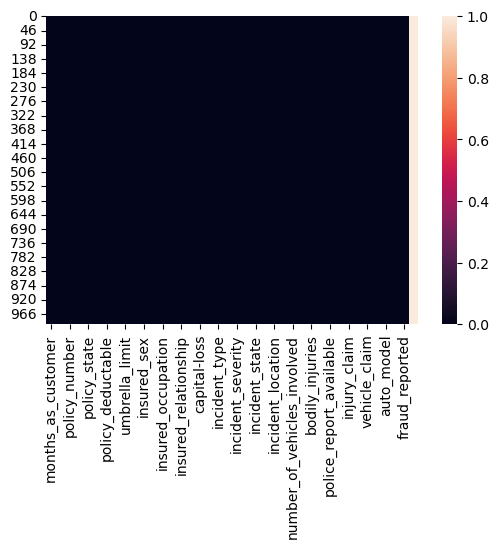

In [9]:
#checking columns values using heatmap

plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())
plt.show()

In [10]:
# Dropping this column with full null values as it deosnt provide any information:
df.drop(columns=['_c39'],axis=1,inplace=True)

In [11]:
# checking number of unique values in each column
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

observations:

We can observe the columns policy_number and incident_location have 1000 unique values which means they have only one value count. 


So it not required for the prediction so we can drop it

In [12]:
# Dropping policy_number and incident_location columns
df.drop("policy_number",axis=1,inplace=True)
df.drop("incident_location",axis=1,inplace=True)

In [13]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('-------------------------------------------------------------')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
-------------------------------------------------------------
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
-------------------------------------------------------------
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
-------------------------------------------------------------

-In the value counts of each column we can realize that the columns umbrella_limit, capital-gains and capital-loss contains more zero values around 79.8%, 50.8% and 47.5%.

-the umbrella_limit columns has more that 70% of zero values, let's drop that column.

The column insured_zip is the zip code given to each person, it contains 995 unique values that means the 5 entries are repeating. we can drop this or we can convert its data type from integer to object for better processing

In [14]:
# Dropping umbrella_limit column
df.drop("umbrella_limit",axis=1,inplace=True)

In [15]:
# Converting Date columns from object type into datetime data type
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [16]:
# Extracting Day, Month and Year column from policy_bind_date
df["policy_bind_Day"] = df['policy_bind_date'].dt.day
df["policy_bind_Month"] = df['policy_bind_date'].dt.month
df["policy_bind_Year"] = df['policy_bind_date'].dt.year

# Extracting Day, Month and Year column from incident_date
df["incident_Day"] = df['incident_date'].dt.day
df["incident_Month"] = df['incident_date'].dt.month
df["incident_Year"] = df['incident_date'].dt.year

In [17]:
# Dropping policy_bind_date and incident_date columns
df.drop(["policy_bind_date","incident_date"],axis=1,inplace=True)

-we have converted object data type into datetime data type. Now let's extract Day, Month and Year from both the columns

-Now we have extracted Day, Month and Year columns from both policy_bind_date and incident_date columns. So we can drop these columns.

-We have dropped the columns policy_bind_date and incident_date as we have extracted the required data from those columns.

-From the value counts of the columns we can also observe the some columns have "?" values, they are not NAN values but we need to fill them.

In [18]:
# Checking which columns contains "?" sign
df[df.columns[(df == '?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

-these column seems to be categorical so we will replace "?" values with most frequently occuring values of the respective columns that is their mode values.

In [19]:
# Checking mode of the above columns
print("The mode of collision_type is:",df["collision_type"].mode())
print("The mode of property_damage is:",df["property_damage"].mode())
print("The mode of police_report_available is:",df["police_report_available"].mode())

The mode of collision_type is: 0    Rear Collision
Name: collision_type, dtype: object
The mode of property_damage is: 0    ?
Name: property_damage, dtype: object
The mode of police_report_available is: 0     ?
1    NO
Name: police_report_available, dtype: object


The mode of property_damage and police_report_available is "?", which means the data is almost covered by "?" sign. So we will fill them by the second highest count of the respective column.

In [20]:
# Checking value count of property_damage column and police_report_available
print("The value count of property_damage:\n", df["property_damage"].value_counts())
print("\n")
print("The value count of police_report_available:\n", df["police_report_available"].value_counts())

The value count of property_damage:
 ?      360
NO     338
YES    302
Name: property_damage, dtype: int64


The value count of police_report_available:
 ?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


In [21]:
# Replacing "?" by their mode values
df['collision_type'] = df.collision_type.str.replace('?', df['collision_type'].mode()[0])
df['property_damage'] = df.property_damage.str.replace('?', "NO")
df['police_report_available'] = df.police_report_available.str.replace('?', "NO")

In [22]:
# Checking value count again
print("The value count of collision_type:\n", df["collision_type"].value_counts())
print("\n")
print("The value count of property_damage:\n", df["property_damage"].value_counts())
print("\n")
print("The value count of police_report_available:\n", df["police_report_available"].value_counts())

The value count of collision_type:
 Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


The value count of property_damage:
 NO     698
YES    302
Name: property_damage, dtype: int64


The value count of police_report_available:
 NO     686
YES    314
Name: police_report_available, dtype: int64


The policy_csl column showing object data type but it contains numerical data, may be it is because of the presence of "/" in that column. So first we will extract two columns csl_per_person and csl_per_accident from policy_csl colums and then will convert their object data type into integer data type.

In [23]:
# Extracting csl_per_person and csl_per_accident from policy_csl column
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [24]:
# Converting object data type into integer data type
df['csl_per_person'] = df['csl_per_person'].astype('int64')
df['csl_per_accident'] = df['csl_per_accident'].astype('int64')

In [25]:
# Since we have extracted the data from policy_csl, let's drop that column
df.drop("policy_csl",axis=1,inplace=True)

In [26]:
# Let's extract age of the vehicle from auto_year by subtracting it from the year 2018
df["Vehicle_Age"] = 2018 - df["auto_year"]
df.drop("auto_year",axis=1, inplace = True)

In [27]:
# Dropping insured_zip column as it is not important for the prediction
df.drop('insured_zip',axis=1,inplace=True)

In [28]:
# Let's check the unique values again
df.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_deductable                3
policy_annual_premium          991
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim                 626
vehicle_claim                  726
auto_make           

incident_Year column has one unique value through out the column also it is not important for our prediction so we can drop this column.

In [29]:
# Dropping incident_Year column 
df.drop("incident_Year", axis=1, inplace=True)

In [30]:
# Let's take a look at the dataframe after preprocessing
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_model,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,csl_per_person,csl_per_accident,Vehicle_Age
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,...,92x,Y,17,10,2014,25,1,250,500,14
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,...,E400,Y,27,6,2006,21,1,250,500,11
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,...,RAM,N,9,6,2000,22,2,100,300,11
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,...,Tahoe,Y,25,5,1990,1,10,250,500,4
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,unmarried,...,RSX,N,6,6,2014,17,2,500,1000,9


In [31]:
df.shape

(1000, 39)

In [32]:
# Separating numerical and categorcal columns

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:\n",categorical_col)
print("\n")

# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:\n",numerical_col)

Categorical columns are:
 ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


Numerical columns are:
 ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_Day', 'policy_bind_Month', 'policy_bind_Year', 'incident_Day', 'incident_Month', 'csl_per_person', 'csl_per_accident', 'Vehicle_Age']


In [33]:
# Checking the list of counts of target
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

There are two unique categories in fraud_reported column these values tells about if an insurance claim is fraudulent or not. Here we can assume that "Y" stands for "Yes" that is the insurance is fraudulent and "N" stands for "No" means the insurance claim is not fraudulent.

In [34]:
# Checking the unique values in target column
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

the value count of the target column fraud_reported we can notice the count of the categories are different which means the data is not balanced

In [35]:
# Statistical Summary
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,property_claim,vehicle_claim,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,csl_per_person,csl_per_accident,Vehicle_Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,...,7399.570000,37928.950000,15.448000,6.559000,2001.604000,13.08400,3.407000,272.650000,580.200000,12.897000
std,115.113174,9.140287,611.864673,244.167395,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,...,4824.726179,18886.252893,8.850176,3.391758,7.360391,10.44318,3.276291,161.603196,287.420547,6.015861
min,0.000000,19.000000,500.000000,433.330000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,...,0.000000,70.000000,1.000000,1.000000,1990.000000,1.00000,1.000000,100.000000,300.000000,3.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,...,4445.000000,30292.500000,8.000000,4.000000,1995.000000,2.00000,1.000000,100.000000,300.000000,8.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,...,6750.000000,42100.000000,16.000000,7.000000,2002.000000,15.00000,2.000000,250.000000,500.000000,13.000000
75%,276.250000,44.000000,2000.000000,1415.695000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,...,10885.000000,50822.500000,23.000000,9.000000,2008.000000,22.00000,5.000000,500.000000,1000.000000,18.000000
max,479.000000,64.000000,2000.000000,2047.590000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,...,23670.000000,79560.000000,31.000000,12.000000,2015.000000,31.00000,12.000000,500.000000,1000.000000,23.000000


Observations:

-Here the counts of all the columns are equal which means there are no missing values in the dataset. 

-In some of the columns like policy_deductable, capital-gains, injury_claim etc we can observe the mean value is greater than the median(50%) which means the data in those columns are skewed to right. 

-And in some of the columns like total_claim_amount, vehicle_claim...etc we can observe the median is greater than the mean which means the data in the columns are skewed to left. 

-And some of the columns have equal mean and median that means the data symmetric and is normally distributed and no skewness present.

-There is a huge difference in 75% and max it shows that huge outliers present in the columns.


***Data Visualization***

*Univariate analysis*

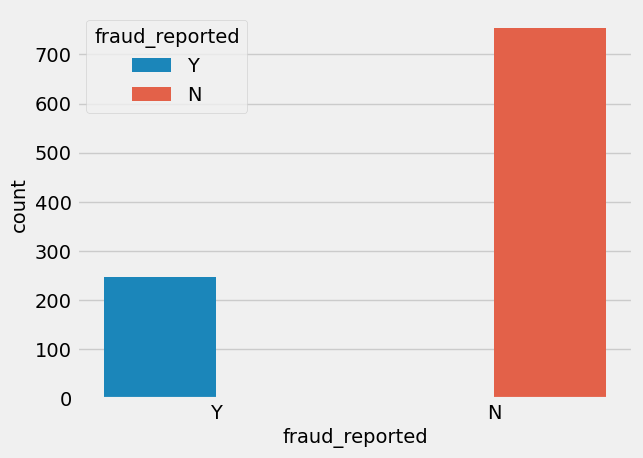

In [36]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x='fraud_reported', data=df, hue='fraud_reported')

Pie plot for the column: policy_state


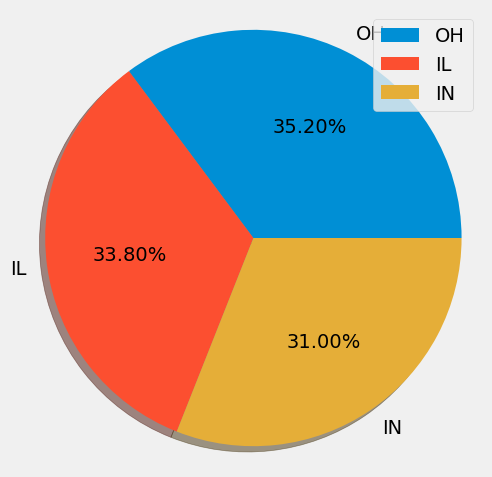

Pie plot for the column: insured_sex


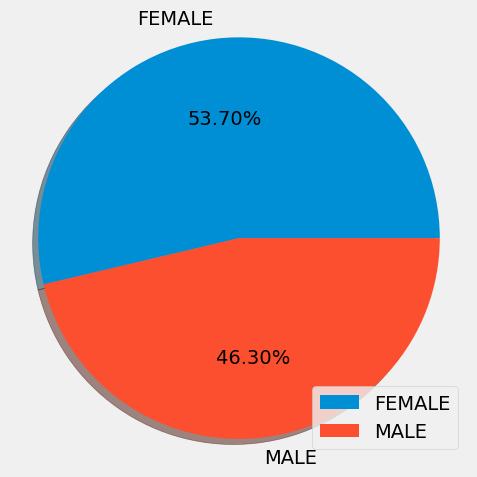

Pie plot for the column: insured_education_level


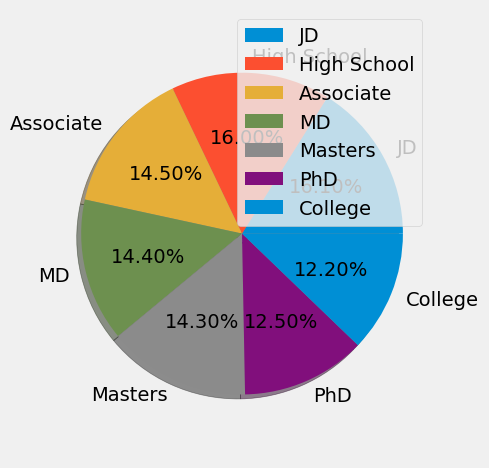

Pie plot for the column: insured_relationship


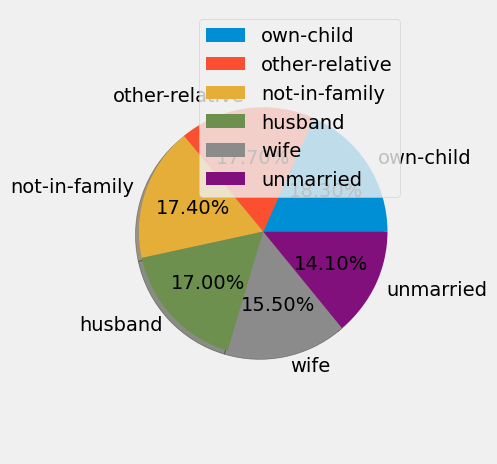

Pie plot for the column: incident_type


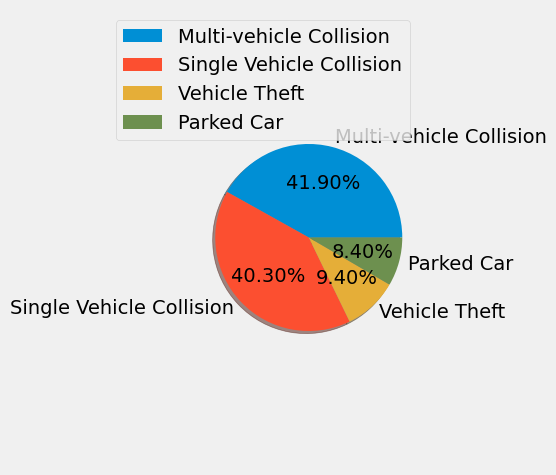

Pie plot for the column: collision_type


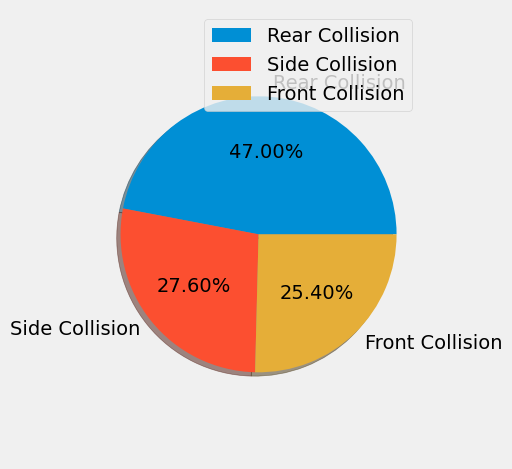

Pie plot for the column: property_damage


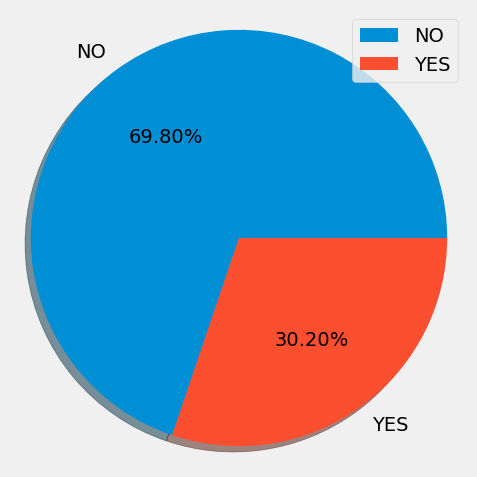

Pie plot for the column: police_report_available


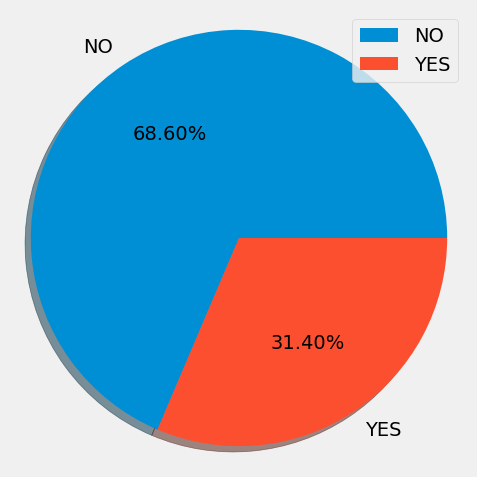

In [44]:

def generate_pie(i):
    plt.figure(figsize=(5,5))
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

cols1 = ['policy_state', 'insured_sex', 'insured_education_level','insured_relationship', 'incident_type','collision_type','property_damage','police_report_available']

plotnumber=1
for j in df[cols1]:
    print(f"Pie plot for the column:", j)
    generate_pie(df[j])

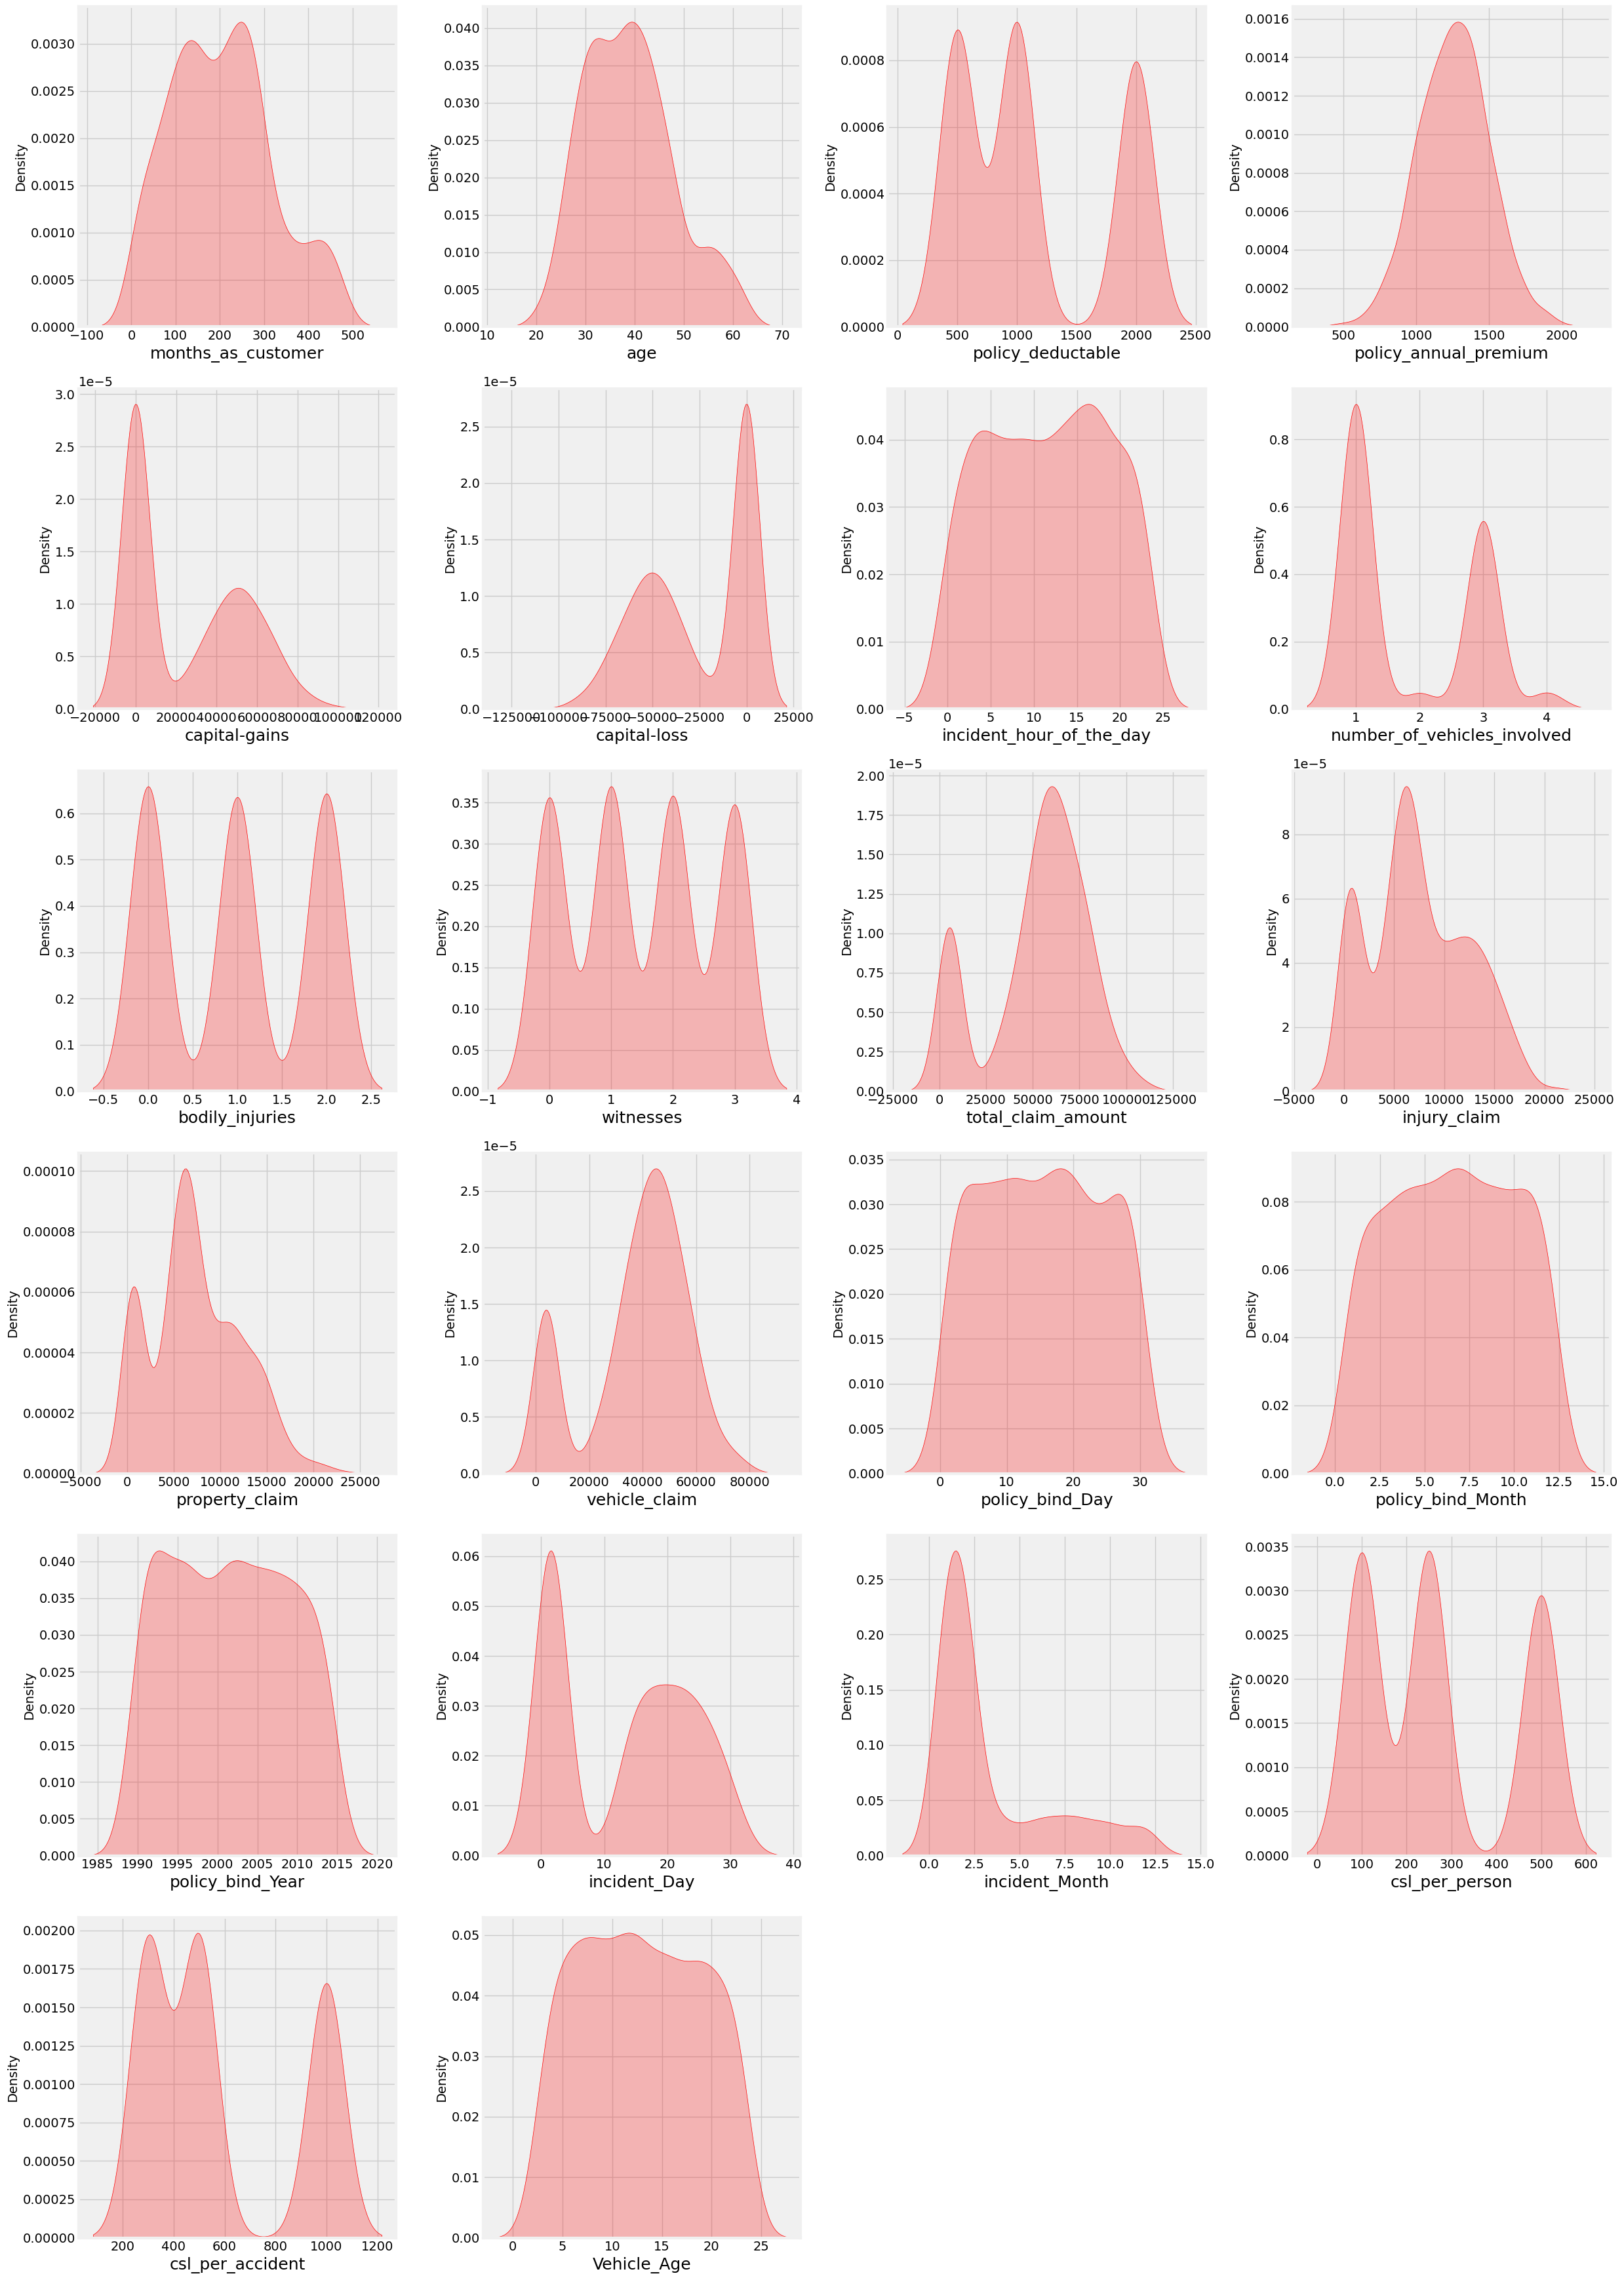

In [45]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="red",hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()

The data is normally distributed in most of the columns.

Some of the columns like capital gains and incident months have mean value greater than the median, hence they are skewed to right.

The data in the column capital loss is skewed to left since the median is greater than the mean.

*Bi-variate Analysis*

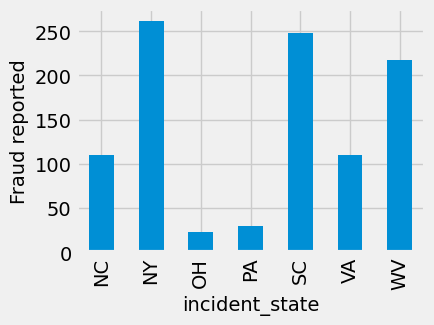

In [50]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(4,3))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

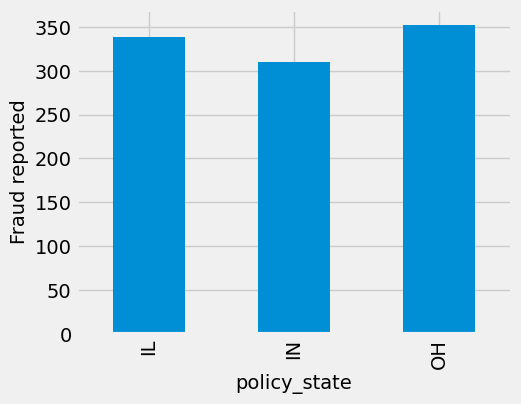

In [51]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(5,4))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

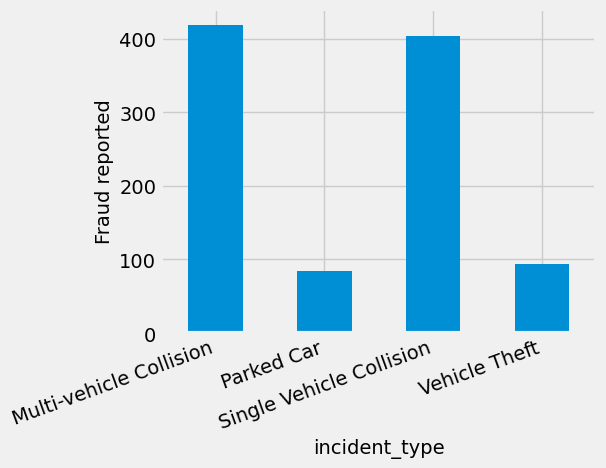

In [52]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(5,4))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

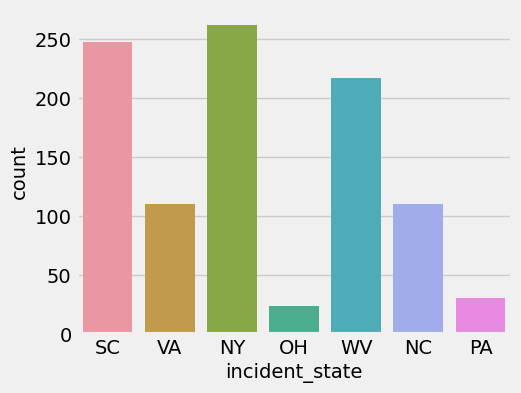

In [53]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(5,4))
ax = sns.countplot(x='incident_state', data=df)

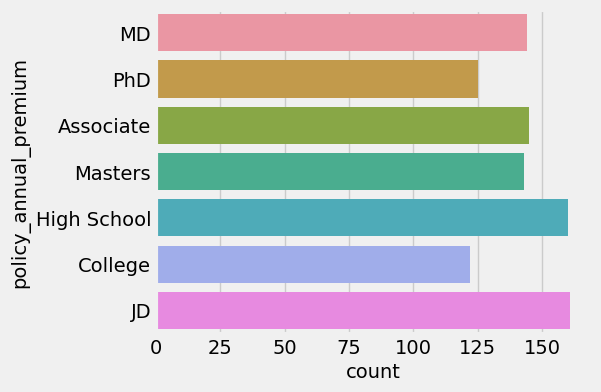

In [54]:
fig = plt.figure(figsize=(5,4))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

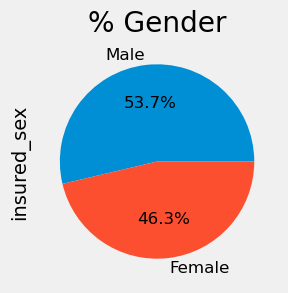

In [56]:
fig = plt.figure(figsize=(4,3))
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

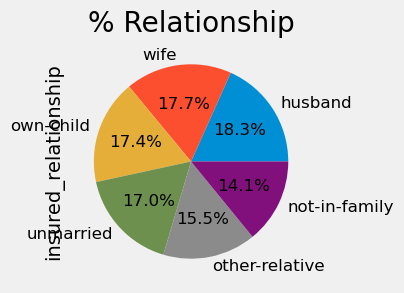

In [57]:
fig = plt.figure(figsize=(4,3))
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

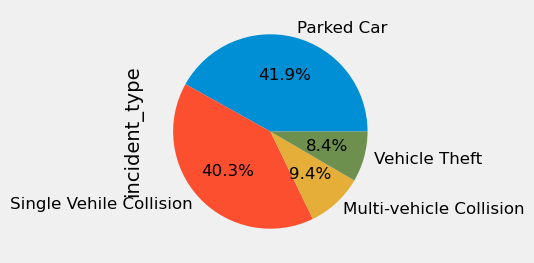

In [58]:
fig = plt.figure(figsize=(4,3))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

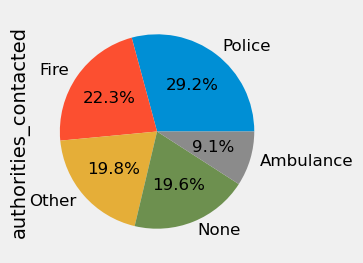

In [59]:
fig = plt.figure(figsize=(4,3))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

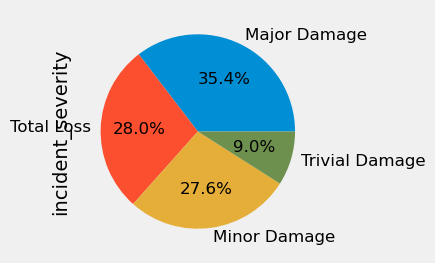

In [60]:
fig = plt.figure(figsize=(4,3))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)

***outliers detection and treatment***

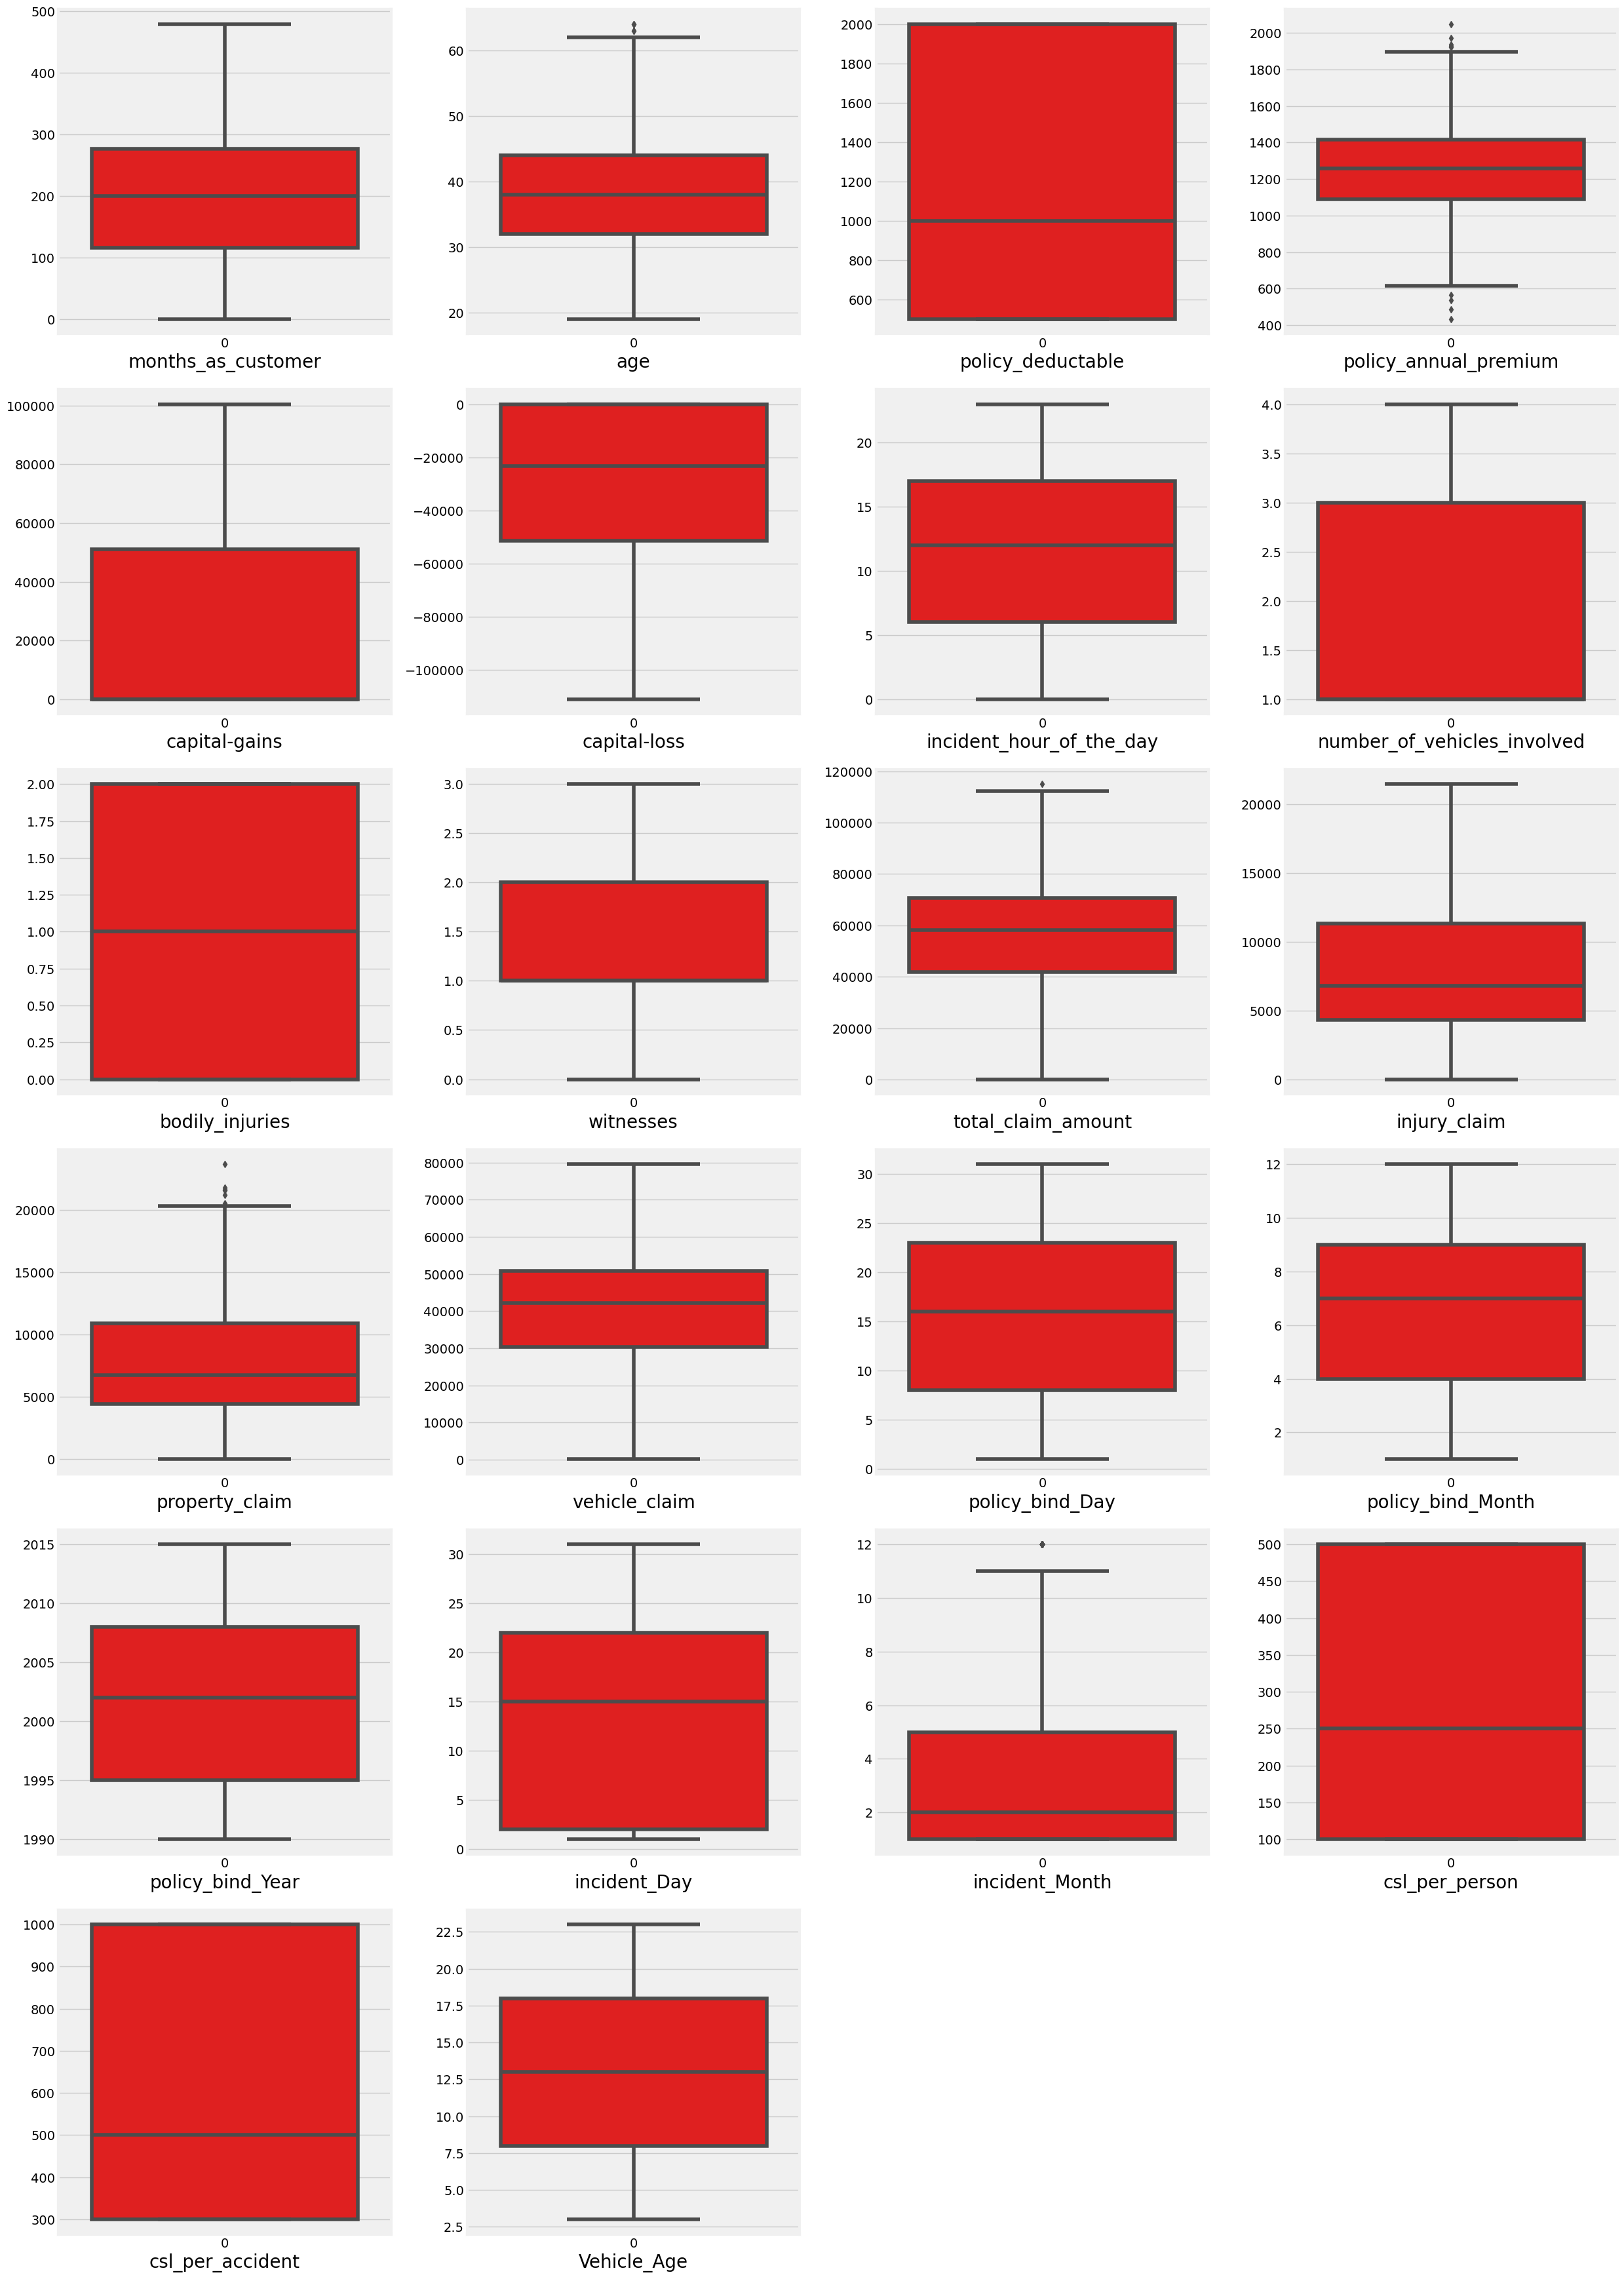

In [61]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can find the outliers in the following columns:

age 

policy_annual_premium

total_claim_amount property_claim 

incident_month

These are the numerical columns which contains outliers. Removing the outliers in these columns using Zscore method.


Z-SCORE

In [62]:
# Feature containing outliers
features = df[['age','policy_annual_premium','total_claim_amount','property_claim','incident_Month']]

z=np.abs(zscore(features))

z

,age,policy_annual_premium,total_claim_amount,property_claim,incident_Month
0,0.990836,0.616705,0.714257,1.165505,0.735040
1,0.334073,0.242521,1.807312,1.372696,0.735040
2,1.088913,0.642233,0.686362,0.736072,0.429664
3,0.224613,0.652886,0.403135,0.219722,2.013343
4,0.552994,1.341980,1.753121,1.399654,0.429664
...,...,...,...,...,...
995,0.103769,0.222884,1.305049,0.273817,0.429664
996,0.224613,0.739141,2.111466,2.214794,0.735040
997,0.541611,0.520739,0.558507,0.020826,0.735040
998,2.523284,0.411866,0.219110,0.451976,0.429664


In [63]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_model,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,csl_per_person,csl_per_accident,Vehicle_Age
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,...,92x,Y,17,10,2014,25,1,250,500,14
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,...,E400,Y,27,6,2006,21,1,250,500,11
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,...,RAM,N,9,6,2000,22,2,100,300,11
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,...,Tahoe,Y,25,5,1990,1,10,250,500,4
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,unmarried,...,RSX,N,6,6,2014,17,2,500,1000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,FEMALE,Masters,craft-repair,paintball,unmarried,...,Accord,N,16,7,1991,22,2,500,1000,12
996,285,41,IL,1000,1436.79,FEMALE,PhD,prof-specialty,sleeping,wife,...,Passat,N,1,5,2014,24,1,100,300,3
997,130,34,OH,500,1383.49,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,...,Impreza,N,17,2,2003,23,1,250,500,22
998,458,62,IL,2000,1356.92,MALE,Associate,handlers-cleaners,base-jumping,wife,...,A5,N,18,11,2011,26,2,500,1000,20


***Checking skewness in the data***

In [64]:
# Checking the skewness
new_df.skew().sort_values()

vehicle_claim                 -0.619755
total_claim_amount            -0.593473
capital-loss                  -0.393015
incident_hour_of_the_day      -0.039123
policy_bind_Month             -0.029722
bodily_injuries                0.011117
witnesses                      0.025758
policy_bind_Day                0.028923
policy_annual_premium          0.032042
Vehicle_Age                    0.049276
incident_Day                   0.055659
policy_bind_Year               0.058499
injury_claim                   0.267970
property_claim                 0.357130
months_as_customer             0.359605
csl_per_person                 0.413713
policy_deductable              0.473229
age                            0.474526
capital-gains                  0.478850
number_of_vehicles_involved    0.500364
csl_per_accident               0.609316
incident_Month                 1.377097
dtype: float64

The following features contains the skewness

total_claim_amount 

vehicle_claim 

incident_Month 

csl_per_accident

In [67]:
# Removing skewness using yeo-johnson  method to get better prediction

skew = ["total_claim_amount","vehicle_claim","incident_Month","csl_per_accident"]
scaler = PowerTransformer(method='yeo-johnson')

In [ ]:
new_df[skew] = scaler.fit_transform(new_df[skew].values)
new_df[skew].head()

In [99]:
# Checking skewness after using yeo-johnson ethod
new_df[skew].skew().sort_values()

vehicle_claim        -0.521354
total_claim_amount   -0.508953
csl_per_accident      0.110964
incident_Month        0.305741
dtype: float64

In [101]:
#encoding the categorical columns

LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [102]:
new_df[categorical_col].head()

,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2,1,4,2,17,0,2,2,0,4,4,1,1,1,10,1,1
1,1,1,4,6,15,2,3,1,1,4,5,5,0,0,8,12,1
2,2,0,6,11,2,3,0,1,1,4,1,1,0,0,4,30,0
3,0,0,6,1,2,4,2,0,0,4,2,0,0,0,3,34,1
4,0,1,0,11,2,4,3,1,1,2,1,0,0,0,0,31,0


***Correlation***

In [103]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_model,fraud_reported,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,csl_per_person,csl_per_accident,Vehicle_Age
months_as_customer,1.000000,0.922092,0.000118,0.023512,-0.003378,0.059002,-0.000848,0.005365,-0.092575,0.071097,...,0.002908,0.020966,0.054175,0.004955,-0.046010,-0.013502,0.019029,-0.022063,-0.022928,-0.001287
age,0.922092,1.000000,-0.015182,0.026772,0.005890,0.072900,0.001485,0.014030,-0.080587,0.075940,...,0.016258,0.012408,0.054465,0.015874,-0.035505,-0.008174,0.016685,-0.012844,-0.012459,-0.003268
policy_state,0.000118,-0.015182,1.000000,0.010740,0.014475,-0.019294,-0.032551,-0.031016,-0.040215,-0.018855,...,-0.024513,0.028864,0.001030,0.071527,-0.005709,0.013370,0.026233,-0.005866,-0.000653,-0.002323
policy_deductable,0.023512,0.026772,0.010740,1.000000,-0.008445,-0.011671,0.014571,-0.050024,0.005134,-0.021763,...,-0.003597,0.015833,0.011204,-0.051368,-0.048465,-0.018867,-0.000169,0.006634,0.006179,-0.027497
policy_annual_premium,-0.003378,0.005890,0.014475,-0.008445,1.000000,0.041830,-0.021475,0.030963,-0.014376,0.006474,...,-0.034998,-0.010174,-0.030886,-0.028452,0.001650,0.016400,-0.012386,0.028569,0.030755,0.040439
insured_sex,0.059002,0.072900,-0.019294,-0.011671,0.041830,1.000000,0.007473,-0.009257,-0.019600,0.004104,...,-0.017679,0.032173,0.045694,-0.007259,-0.031981,-0.007249,0.024223,-0.019001,-0.008959,0.028638
insured_education_level,-0.000848,0.001485,-0.032551,0.014571,-0.021475,0.007473,1.000000,-0.021502,0.022806,-0.021595,...,0.050878,0.011520,0.014464,-0.007489,0.017801,-0.055411,0.069312,0.011093,0.010425,-0.045094
insured_occupation,0.005365,0.014030,-0.031016,-0.050024,0.030963,-0.009257,-0.021502,1.000000,-0.009818,-0.008141,...,0.020878,0.003335,-0.003030,0.024516,-0.025282,-0.022786,0.013226,0.018978,0.019575,0.004827
insured_hobbies,-0.092575,-0.080587,-0.040215,0.005134,-0.014376,-0.019600,0.022806,-0.009818,1.000000,-0.097837,...,0.031208,-0.047983,0.028387,-0.005233,-0.013819,0.014295,-0.001239,-0.013322,-0.007772,0.015606
insured_relationship,0.071097,0.075940,-0.018855,-0.021763,0.006474,0.004104,-0.021595,-0.008141,-0.097837,1.000000,...,0.062286,0.017992,0.008900,0.040931,-0.006190,-0.083525,0.039255,-0.022125,-0.031298,0.026099


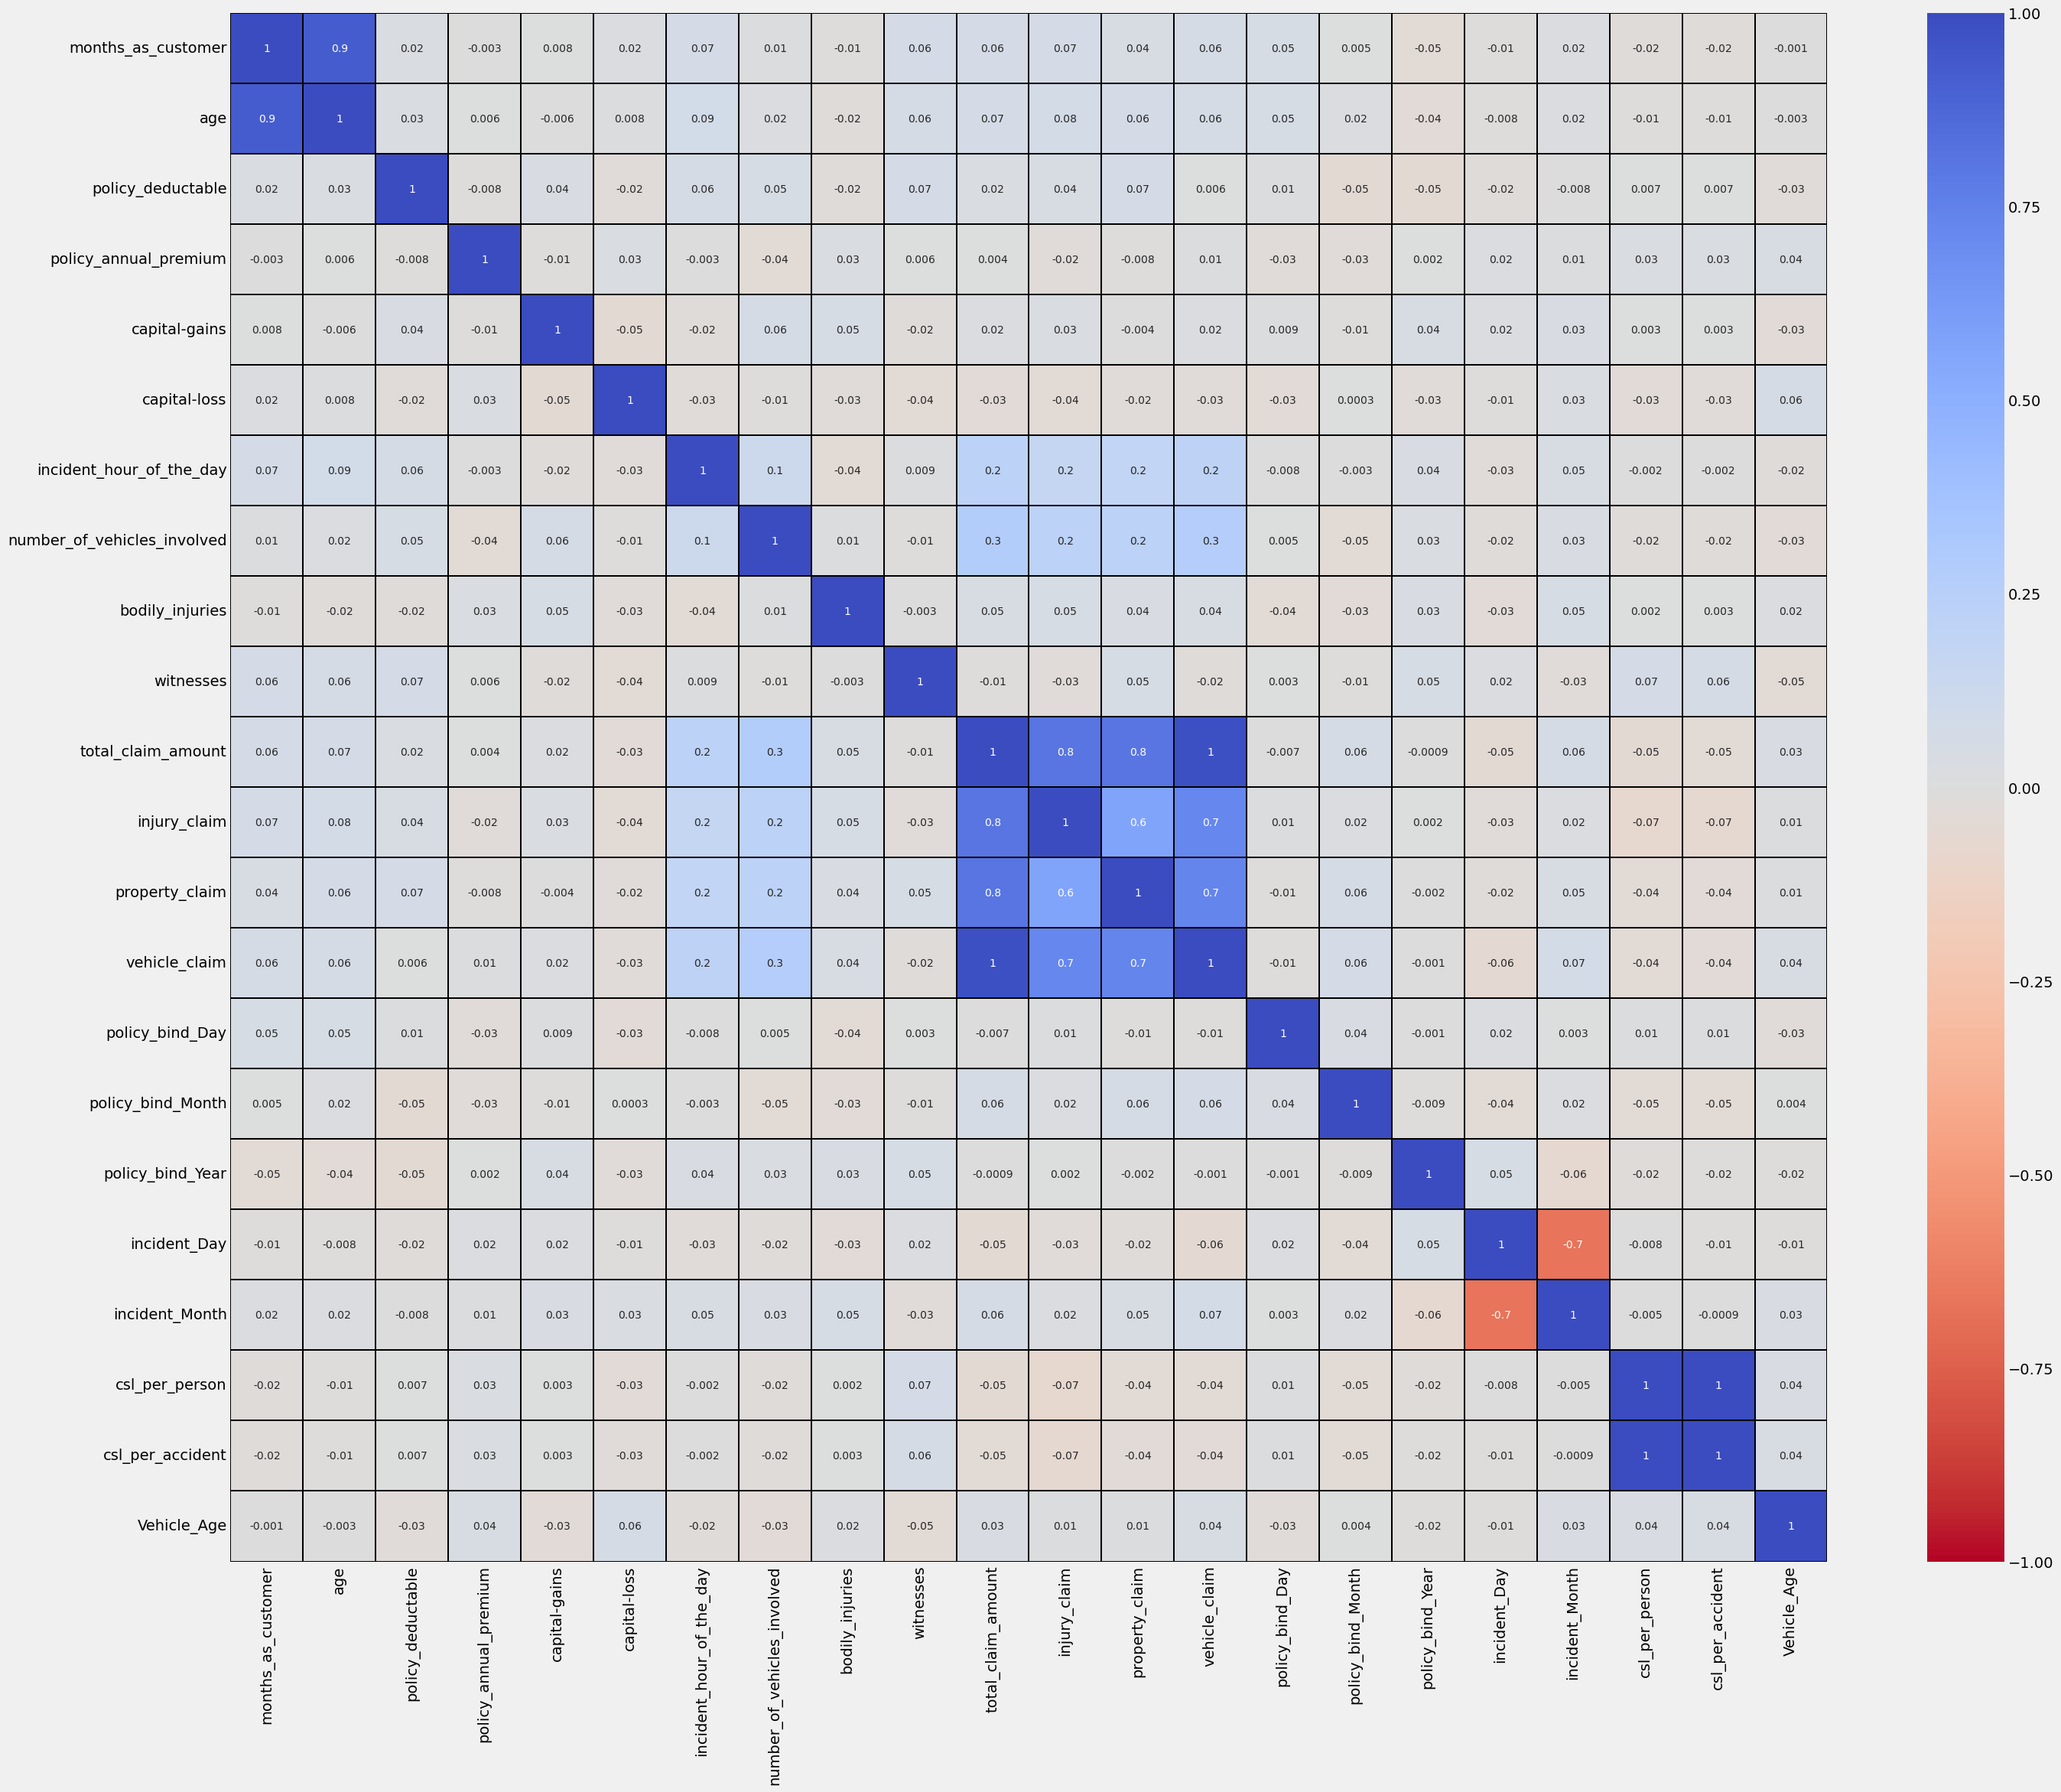

In [68]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(30,25))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g',linecolor="black", annot = True, annot_kws={'size':10},cmap="coolwarm_r")
plt.yticks(rotation=0);

This heat map contains both positive and negative correlation.

There is very less correlation between the target and the label. 

We can observe the most of the columns are highly correlated with each other which leads to the multicollinearity problem.

We will check the VIF value to overcome with this multicollinearity problem.

***Data splitting***


In [106]:
x = new_df.drop("fraud_reported", axis=1)
y = new_df["fraud_reported"]

# Checking the dimenstion of X & Y
x.shape, y.shape

((996, 38), (996,))

***Feature Scaling***

In [107]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,policy_bind_Day,policy_bind_Month,policy_bind_Year,incident_Day,incident_Month,csl_per_person,csl_per_accident,Vehicle_Age
0,1.074671,0.987190,1.186130,-0.224722,0.621371,1.075102,0.531088,-1.162296,1.280299,-1.436113,...,0.857248,-1.644810,0.177487,1.013751,1.686176,1.139807,-1.101370,-0.137684,0.052612,0.182338
1,0.204846,0.330455,-0.018137,1.409024,-0.251375,1.075102,0.531088,-0.166257,0.928186,-0.246617,...,0.360986,-0.657437,1.309223,-0.166145,0.599693,0.756374,-1.101370,-0.137684,0.052612,-0.316587
2,-0.612790,-1.092470,1.186130,1.409024,0.647301,-0.930144,1.557206,1.078792,-1.360550,0.348131,...,-0.631538,0.958263,-0.727901,-0.166145,-0.215170,0.852233,-0.026479,-1.066352,-1.174021,-0.316587
3,0.448397,0.221000,-1.222403,1.409024,0.658123,-0.930144,1.557206,-1.411305,-1.360550,0.942878,...,-0.879669,1.317308,1.082875,-0.461119,-1.573274,-1.160788,1.553647,-0.137684,0.052612,-1.480744
4,0.204846,0.549367,-1.222403,-0.224722,1.358059,1.075102,-1.521148,1.078792,-1.360550,0.942878,...,-1.624063,1.048024,-1.067422,-0.166145,1.686176,0.372942,-0.026479,1.410096,1.313327,-0.649203


In [108]:
#checking multicolinearity

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,6.851319,months_as_customer
1,6.855557,age
2,1.039410,policy_state
3,1.045656,policy_deductable
4,1.037450,policy_annual_premium
5,1.037410,insured_sex
6,1.047043,insured_education_level
7,1.017493,insured_occupation
8,1.052669,insured_hobbies
9,1.052965,insured_relationship


We can observe some columns have VIF above 10 that means they are causing multicollinearity problem. Let's drop the feature having high VIF value amongst all the columns

In [109]:
# Dropping total_claim_amount column as it contains high VIF value
x.drop(["total_claim_amount"],axis=1,inplace=True)

In [110]:
# Dropping csl_per_accident column
x.drop(["csl_per_accident"],axis=1,inplace=True)

In [111]:
# Again checking VIF value to confirm whether the multicollinearity still exists or not
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(x.values, i) 
                     for i in range(x.shape[1])]
vif["Features"]=x.columns
vif

,vif_Features,Features
0,6.847077,months_as_customer
1,6.852905,age
2,1.038072,policy_state
3,1.043977,policy_deductable
4,1.036330,policy_annual_premium
5,1.029258,insured_sex
6,1.046990,insured_education_level
7,1.016674,insured_occupation
8,1.049392,insured_hobbies
9,1.048658,insured_relationship


In [112]:
y.value_counts()

0    750
1    246
Name: fraud_reported, dtype: int64

In [113]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [114]:
# Checking value count of target column
y.value_counts()

1    750
0    750
Name: fraud_reported, dtype: int64

***finding best random state***

In [115]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    pred = rfc.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9133333333333333  on Random_state  78


***creating train_test split***

In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

***MODEL SELECTION***

In [117]:
# Checking accuracy for Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

# Prediction
predrfc = rfc.predict(x_test)

print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

0.9066666666666666
[[211  23]
 [ 19 197]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       234
           1       0.90      0.91      0.90       216

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450



In [118]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.9
[[210  24]
 [ 21 195]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       234
           1       0.89      0.90      0.90       216

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



In [119]:
# Checking accuracy for Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

# Prediction
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

0.8911111111111111
[[210  24]
 [ 25 191]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       234
           1       0.89      0.88      0.89       216

    accuracy                           0.89       450
   macro avg       0.89      0.89      0.89       450
weighted avg       0.89      0.89      0.89       450



In [120]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.8533333333333334
[[208  26]
 [ 40 176]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       234
           1       0.87      0.81      0.84       216

    accuracy                           0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.85      0.85      0.85       450



In [121]:
# Checking accuracy for BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)

# Prediction
predBC = BC.predict(x_test)

print(accuracy_score(y_test, predBC))
print(confusion_matrix(y_test, predBC))
print(classification_report(y_test,predBC))

0.8622222222222222
[[214  20]
 [ 42 174]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       234
           1       0.90      0.81      0.85       216

    accuracy                           0.86       450
   macro avg       0.87      0.86      0.86       450
weighted avg       0.87      0.86      0.86       450



In [122]:
# Checking accuracy for ExtraTreesClassifier
XT = ExtraTreesClassifier()
XT.fit(x_train,y_train)

# Prediction
predXT = XT.predict(x_test)

print(accuracy_score(y_test, predXT))
print(confusion_matrix(y_test, predXT))
print(classification_report(y_test,predXT))

0.9244444444444444
[[213  21]
 [ 13 203]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       234
           1       0.91      0.94      0.92       216

    accuracy                           0.92       450
   macro avg       0.92      0.93      0.92       450
weighted avg       0.93      0.92      0.92       450



In [123]:
# cv score for Random Forest Classifier
print('Random Forest Classifier:',cross_val_score(rfc,x,y,cv=5).mean())

# cv score for Support Vector Machine Classifier
print('Support Vector Machine Classifier:',cross_val_score(svc,x,y,cv=5).mean())

# cv score for Gradient Boosting Classifier
print('Gradient Boosting Classifier:',cross_val_score(gb,x,y,cv=5).mean())

# cv score for AdaBoosting Classifier
print('AdaBoosting Classifier:',cross_val_score(ABC,x,y,cv=5).mean())

# cv score for Bagging Classifier
print('Bagging Classifier:',cross_val_score(BC,x,y,cv=5).mean())

# cv score for Extra Trees Classifier
print('Extra Trees Classifier:',cross_val_score(XT,x,y,cv=5).mean())

Random Forest Classifier: 0.8699999999999999
Support Vector Machine Classifier: 0.8666666666666666
Gradient Boosting Classifier: 0.876
AdaBoosting Classifier: 0.852
Bagging Classifier: 0.8699999999999999
Extra Trees Classifier: 0.9099999999999999


***Hyperparameter tuning***

In [124]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini','entropy'],
              'max_features':['aoto','sqrt','log2'],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50,100, 200, 300]}

In [125]:
GCV=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [126]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1]})

In [127]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 50,
 'n_jobs': -1}

In [128]:
Insurance = ExtraTreesClassifier(criterion='gini', max_depth=20, max_features='log2', n_estimators=300, n_jobs=-2)
Insurance.fit(x_train, y_train)
pred = Insurance.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

92.66666666666666


In [129]:
# Lets plot confusion matrix for  FinalModel
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["NO","YES"]
y_axis_labels = ["NO","YES"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="ocean",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for  Final Model')
plt.show()

In [131]:
# Saving the model using .pkl
import joblib
joblib.dump(Insurance,"Insurance_claim_Fraud_Detection.pkl")

['Insurance_claim_Fraud_Detection.pkl']